In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns

# model
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score,cross_val_predict,KFold
from sklearn.metrics import make_scorer,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler
from sklearn.preprocessing import MinMaxScaler, Normalizer
import lightgbm as lgb

## 拼接数据

In [2]:
data1 = pd.read_excel('data_6.xlsx')

In [3]:
data2 = pd.read_excel('data.xlsx')

In [4]:
data1 = data1.fillna(0)
data2 = data2.fillna(0)
print(data1.isnull().any().any(),data2.isnull().any().any())
y1 = data1['t2']
x1 = data1[['Mn', 'Co', 'Cu', 'Ga', 'Ge', 'Nb', 'Ni', 'Si', 'Sn', 'Zn',
       'N', 'C', 'B', 'Fe', 'Ag', 'element_B','Sb', 'Cr', 'Re']]
x1.head()

False False


,Mn,Co,Cu,Ga,Ge,Nb,Ni,Si,Sn,Zn,N,C,B,Fe,Ag,element_B,Sb,Cr,Re
0,3.1,0,0,0,0,0,0,0,0.5,0.4,1,0,0,0,0,2,0,0,0
1,3.1,0,0,0,0,0,0,0,0.4,0.5,1,0,0,0,0,2,0,0,0
2,3.1,0,0,0,0,0,0,0,0.3,0.6,1,0,0,0,0,2,0,0,0
3,3.2,0,0,0,0,0,0,0,0.4,0.4,1,0,0,0,0,2,0,0,0
4,3.2,0,0,0,0,0,0,0,0.3,0.5,1,0,0,0,0,2,0,0,0


In [5]:
y2 = data2['t2']
x2 = data2[['Mn', 'Co', 'Cu', 'Ga', 'Ge', 'Nb', 'Ni', 'Si', 'Sn', 'Zn',
       'N', 'C', 'B', 'Fe', 'Ag', 'element_B','Sb', 'Cr', 'Re']]
x2.head()

,Mn,Co,Cu,Ga,Ge,Nb,Ni,Si,Sn,Zn,N,C,B,Fe,Ag,element_B,Sb,Cr,Re
0,3.00,0,0.53,0.0,0.47,0.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.00,0.0,2,0.0,0.0,0.0
1,3.00,0,0.50,0.0,0.50,0.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.00,0.0,2,0.0,0.0,0.0
2,3.00,0,0.00,0.7,0.30,0.0,0.0,0.0,0.0,0.0,0.88,0.12,0.0,0.00,0.0,2,0.0,0.0,0.0
3,3.10,0,0.00,0.5,0.40,0.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.00,0.0,3,0.0,0.0,0.0
4,2.88,0,0.00,0.0,0.50,0.0,0.0,0.0,0.0,0.5,1.00,0.00,0.0,0.12,0.0,2,0.0,0.0,0.0


In [6]:
x = x1.append(x2)
y = y1.append(y2)

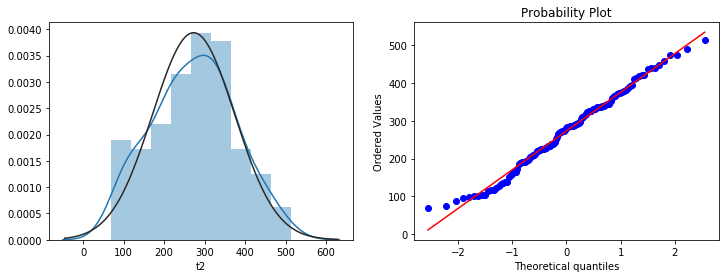

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(y.dropna(),fit=stats.norm);
plt.subplot(1,2,2)
_ = stats.probplot(y.dropna(),plot=plt)

In [8]:
x.head()

,Mn,Co,Cu,Ga,Ge,Nb,Ni,Si,Sn,Zn,N,C,B,Fe,Ag,element_B,Sb,Cr,Re
0,3.1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.4,1.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0
1,3.1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.5,1.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0
2,3.1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.6,1.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0
3,3.2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.4,1.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0
4,3.2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.5,1.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0


In [9]:
x.shape

(129, 19)

In [10]:
y.shape

(129,)

In [11]:
from sklearn import preprocessing
standar = preprocessing.StandardScaler()
x = pd.DataFrame(standar.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.767431,0.0,-1.056675,-0.437706,-0.806016,-0.219942,-0.201151,-0.32835,1.693257,1.477822,0.378477,-0.373457,-0.154303,-0.088388,-0.32752,-0.48592,-0.252357,-0.142615,-0.135724
1,0.767431,0.0,-1.056675,-0.437706,-0.806016,-0.219942,-0.201151,-0.32835,1.224221,1.968527,0.378477,-0.373457,-0.154303,-0.088388,-0.32752,-0.48592,-0.252357,-0.142615,-0.135724
2,0.767431,0.0,-1.056675,-0.437706,-0.806016,-0.219942,-0.201151,-0.32835,0.755185,2.459233,0.378477,-0.373457,-0.154303,-0.088388,-0.32752,-0.48592,-0.252357,-0.142615,-0.135724
3,1.733272,0.0,-1.056675,-0.437706,-0.806016,-0.219942,-0.201151,-0.32835,1.224221,1.477822,0.378477,-0.373457,-0.154303,-0.088388,-0.32752,-0.48592,-0.252357,-0.142615,-0.135724
4,1.733272,0.0,-1.056675,-0.437706,-0.806016,-0.219942,-0.201151,-0.32835,0.755185,1.968527,0.378477,-0.373457,-0.154303,-0.088388,-0.32752,-0.48592,-0.252357,-0.142615,-0.135724


In [12]:
x.shape

(129, 19)

In [13]:
from sklearn.model_selection  import KFold
import numpy as np

def mean_relative_error(y_true,y_pred):
    
    # print(y_pred)
    # print(y_true.values.squeeze())
    # print(np.array(y_true).squeeze())
    y_true = np.array(y_true).squeeze()
    # print(y_true)
    # print(abs(y_true - y_pred) )
    # print(abs(y_true - y_pred) / abs(y_true))
    relative_error = np.average(abs(y_true - y_pred) / abs(y_true),axis=0)
    # print(relative_error)
    return relative_error

def kfold_relative_error(model,X=x,y=y):
   # 5折交叉验证
    Folds=5
    kf = KFold(n_splits = 2 ,shuffle=True, random_state = 2021)
    # 记录训练和预测MSE
    # 记录训练和预测r2
    train_r2_ = []
    test_r2_ = []

    # 线下训练预测
    for (train, test) in (kf.split(X,y)):

       # 切分训练集和预测集
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]

        # 训练模型
        model.fit(X_train,y_train)

        # 训练集预测 测试集预测
        y_train_KFold_predict = model.predict(X_train)
        y_test_KFold_predict = model.predict(X_test) 

        #print('第{}折 训练和预测 训练r2 预测r2'.format(i))
        train_r2 = model.score(X_train,y_train)
#         train_r2 = mean_relative_error(y_train,y_train_KFold_predict)
        # print('------', '训练r2', train_r2, '------')
        test_r2 = model.score(X_test,y_test)
#         test_r2 = mean_relative_error(y_test,y_test_KFold_predict)
        #print('------', '预测r2', test_r2, '------')

        train_r2_.append(train_r2)
        test_r2_.append(test_r2)

    mean_r2_train = np.mean(train_r2_)
    mean_r2_test = np.mean(test_r2_)
    
    return(mean_r2_train,mean_r2_test)

0.9932098465464313
0.8510898615588125


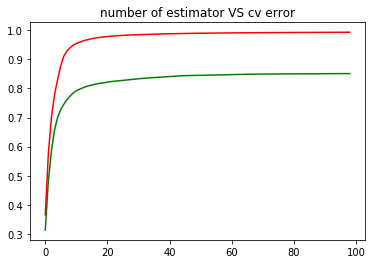

In [14]:
train_scores = []
test_scores = []
for i in range(10,1000,10):
    clf = SVR(C=i)
    train, test = kfold_relative_error(clf,x,y)
    train_scores.append(train)
    test_scores.append(test)
plt.plot(test_scores, color='green',label="test")
plt.plot(train_scores, color='red',label='train')
plt.title("number of estimator VS cv error")
print(np.max(train_scores))
print(np.max(test_scores))

0.9995428712435869
0.8079963555397709


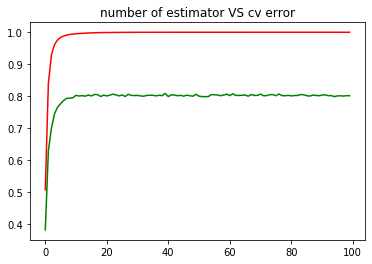

In [22]:
train_scores = []
test_scores = []
for i in range(5,1000,10):
    clf = GradientBoostingRegressor(n_estimators=i)
    train, test = kfold_relative_error(clf,x,y)
    train_scores.append(train)
    test_scores.append(test)
plt.plot(test_scores, color='green',label="test")
plt.plot(train_scores, color='red',label='train')
plt.title("number of estimator VS cv error")
print(np.max(train_scores))
print(np.max(test_scores))

0.9995429028355822
0.8118553590773216


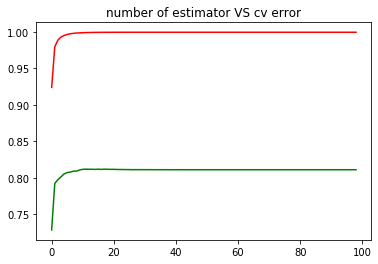

In [26]:
train_scores = []
test_scores = []
for i in range(10,1000,10):
    clf = XGBRegressor(max_depth=3,n_estimators=i,random_state=2021)
    train, test = kfold_relative_error(clf,x,y)
    train_scores.append(train)
    test_scores.append(test)
plt.plot(test_scores, color='green',label="test")
plt.plot(train_scores, color='red',label='train')
plt.title("number of estimator VS cv error")
print(np.max(train_scores))
print(np.max(test_scores))

## 预测未知的三条

In [17]:
data_val = pd.read_excel('data_val.xls')

y_ = data_val['t2']
x_ = data_val[['Mn', 'Co', 'Cu', 'Ga', 'Ge', 'Nb', 'Ni', 'Si', 'Sn', 'Zn',
       'N', 'C', 'B', 'Fe', 'Ag', 'element_B','Sb', 'Cr', 'Re']]

In [18]:
# from sklearn import preprocessing
# standar = preprocessing.StandardScaler()
# x_ = pd.DataFrame(standar.fit_transform(x_))
# x_.head()

In [19]:
y_pre = clf.predict(x_)

In [20]:
y_pre

array([242.62474843, 238.51574777, 234.57830908])

In [21]:
y_

0    306
1    273
2    217
Name: t2, dtype: int64